<a href="https://colab.research.google.com/github/saiteja1917/tutorial/blob/main/task-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()

Saving data_set_ALL_AML_train.csv to data_set_ALL_AML_train.csv


In [26]:
import pandas as pd
df = pd.read_csv('data_set_ALL_AML_train.csv')

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Remove categorical columns
df_numeric = df.drop(categorical_cols, axis=1)

df_numeric.head()

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
0,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,-58,-1,-307,265,-76,215,238,7,106,42,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,88,283,309,12,168,71,55,-2,268,219,...,132,318,325,392,241,193,312,230,330,337
4,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

df_normalized.head()

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
0,-0.377790,-0.335912,-0.311532,-0.314539,-0.330649,-0.281747,-0.272082,-0.413837,-0.304155,-0.283968,...,-0.207943,-0.369196,-0.280829,-0.282606,-0.280682,-0.227839,-0.409289,-0.262213,-0.328678,-0.342438
1,-0.350848,-0.309177,-0.300669,-0.305565,-0.338647,-0.260500,-0.301925,-0.349514,-0.355319,-0.290990,...,-0.251786,-0.383767,-0.278863,-0.309698,-0.327097,-0.282120,-0.359556,-0.269282,-0.310211,-0.362780
2,-0.308889,-0.280011,-0.404472,-0.143591,-0.318022,-0.140232,-0.143593,-0.237264,-0.265008,-0.230271,...,-0.234167,-0.238800,-0.222245,-0.253896,-0.330827,-0.233309,-0.321269,-0.228535,-0.292975,-0.316513
3,-0.244405,-0.164968,-0.156633,-0.251716,-0.215316,-0.197960,-0.219443,-0.241048,-0.202216,-0.157160,...,-0.156726,-0.170800,-0.143215,-0.094980,-0.179148,-0.152940,-0.160621,-0.153278,-0.142368,-0.154181
4,-0.413565,-0.386547,-0.432233,-0.435913,-0.382844,-0.335467,-0.407618,-0.467650,-0.387490,-0.321143,...,-0.365285,-0.367701,-0.426699,-0.384506,-0.358179,-0.255611,-0.338636,-0.401501,-0.354942,-0.450926


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming df_normalized is your 3D DataFrame
# Initialize PCA for 2 components
pca = PCA(n_components=2)

# Fit and transform the normalized data
df_pca = pd.DataFrame(pca.fit_transform(df_normalized))

# Optionally, name the new columns
df_pca.columns = ['PC1', 'PC2']

df_pca.head()

,PC1,PC2
0,-1.925955,0.126824
1,-2.000741,0.093901
2,-1.665066,0.119019
3,-1.162355,-0.061071
4,-2.322860,0.076354


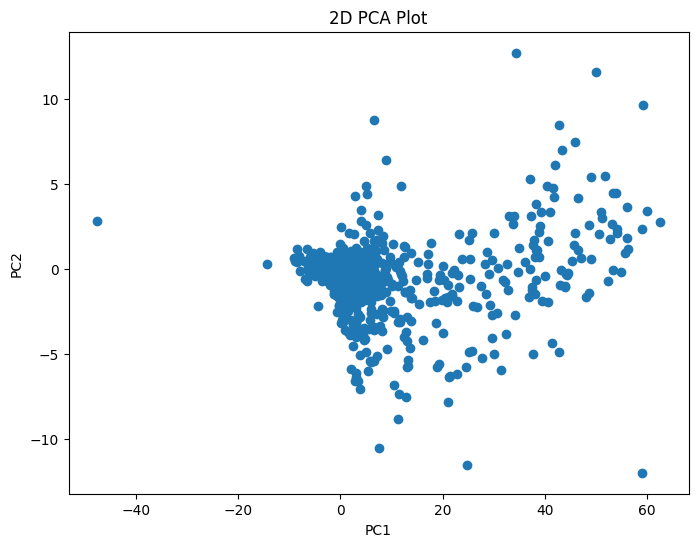

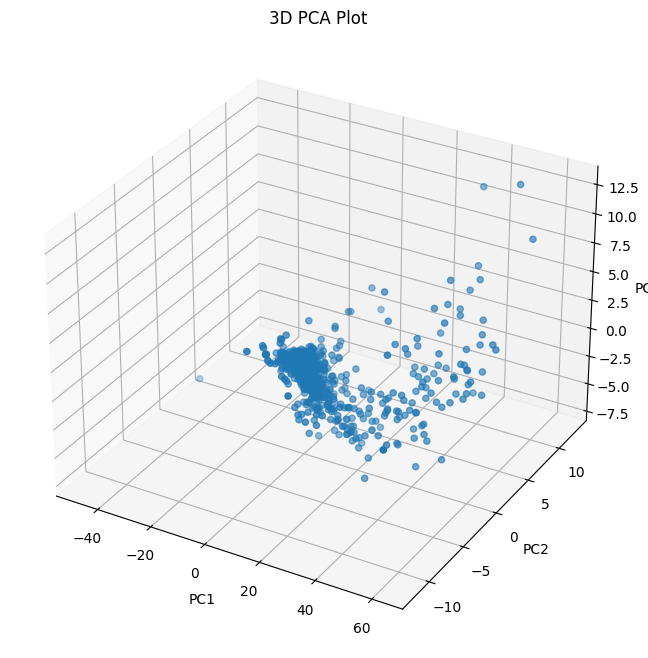

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2D plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Plot')
plt.show()

# For 3D, you'll need an additional component. Let's assume you did PCA with 3 components:
pca_3d = PCA(n_components=3)
df_pca_3d = pd.DataFrame(pca_3d.fit_transform(df_normalized))
df_pca_3d.columns = ['PC1', 'PC2', 'PC3']
print()
print()
print()



# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Plot')
plt.show()
